<a href="https://colab.research.google.com/github/ToluAbolude/Trading/blob/main/ARIMA_to_Predict_Bitcoin_Prices_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 19.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [10]:
df = yf.download('BTC-USD')
print(df)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-04-23  39738.722656  39935.859375  39352.203125  39486.730469   
2022-04-24  39478.375000  39845.925781  39233.539062  39469.292969   
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38091.472656  39372.062500  37997.312500  39178.769531   

               Adj C

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

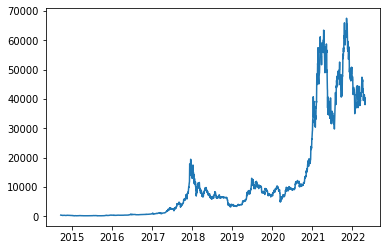

In [7]:
plt.plot(df.index, df['Adj Close'])

In [11]:
# Train test split
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

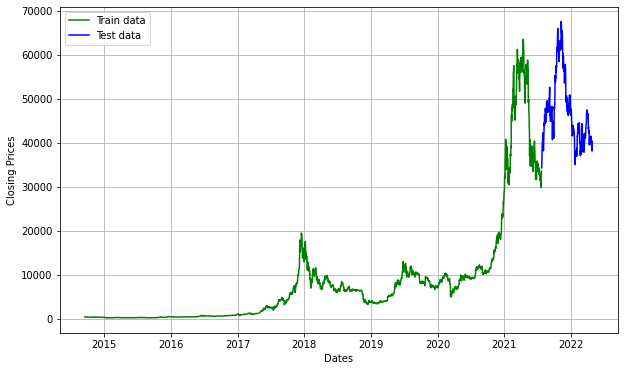

In [12]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label = 'Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'Test data')
plt.legend()


In [13]:
model_predictions = []
n_test_obser = len(testing_data)

In [26]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [20]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2778
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22485.455
Method:                       css-mle   S.D. of innovations            792.487
Date:                Wed, 27 Apr 2022   AIC                          44982.909
Time:                        23:36:51   BIC                          45018.486
Sample:                             1   HQIC                         44995.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5566     15.285      0.887      0.375     -16.401      43.514
ar.L1.D.y     -0.0249      0.019     -1.312      0.189      -0.062       0.012
ar.L2.D.y     -0.0054      0.019     -0.284      0.7

In [27]:
len(model_predictions)

278

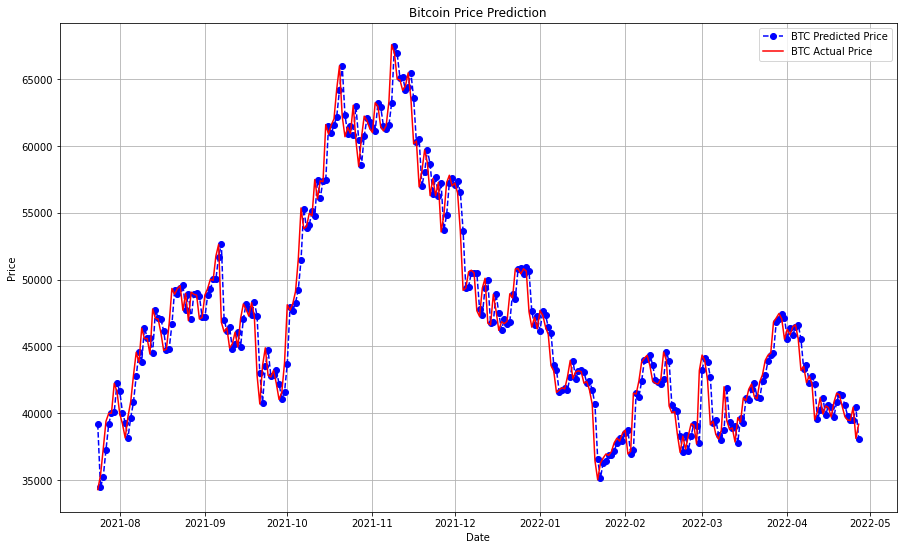

In [31]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range= df[to_row:].index

plt.plot(date_range, model_predictions, color= 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color= 'red',label = 'BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [32]:
# Performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape)) #Mean Absolute Percentage Error {MAPE: 0.025581472290318062}

# Around 2.5% MAPE(Mean Absolute Percentage Error) implies the model is about 97.5% accurate in prediciting the test set observations.

MAPE: 0.025581472290318062
